# Milestone 02 – Independent Research Project
## Behavioral Factors and Obesity Among U.S. High School Students (YRBSS)

### **Research Question**
What behavioral factors—such as physical activity levels, nutrition habits, and sugary drink intake—are most strongly associated with obesity among U.S. high school students according to the Youth Risk Behavior Surveillance System (YRBSS)?

### **Objectives**
port and inspect the YRBSS dataset (2001–2023)
- Select obesity and key behavioral indicators:
  - sugary drink intake
  - physical activity
  - insufficient fruit intake
  - insufficient vegetable intake
- Compute descriptive statistics
- Calculate obesity prevalence by behavior categories
- Generate visualizations:
  - Bar charts: obesity rate by physical activity categories
  - Bar + line charts: sugary drink frequency vs obesity
  - Nutrition behavior comparisons (fruit & vegetables)
- Identify which behavior is most strongly associated with obesity.


In [16]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (8, 6)

df = pd.read_csv("YRBSS_cleaned_dataset.csv")

# keep rows with numeric values
df = df[df["data_value"].notna()].copy()

print(df.shape)
df.head()


(31497, 31)


,yearstart,yearend,locationabbr,locationdesc,datasource,class,topic,question,data_value_unit,data_value_type,...,geolocation,classid,topicid,questionid,datavaluetypeid,locationid,stratificationcategory1,stratification1,stratificationcategoryid1,stratificationid1
14,2001,2001,AL,Alabama,Youth Risk Behavior Surveillance System,Fruits and Vegetables,Fruits and Vegetables - Behavior,Percent of students in grades 9-12 who consume...,NaN,Value,...,"(32.840571122, -86.631860762)",FV,FV1,Q020,VALUE,1,Sex,Female,SEX,FEMALE
15,2001,2001,AL,Alabama,Youth Risk Behavior Surveillance System,Fruits and Vegetables,Fruits and Vegetables - Behavior,Percent of students in grades 9-12 who consume...,NaN,Value,...,"(32.840571122, -86.631860762)",FV,FV1,Q020,VALUE,1,Grade,9th,GRADE,GRADE09
16,2001,2001,AL,Alabama,Youth Risk Behavior Surveillance System,Fruits and Vegetables,Fruits and Vegetables - Behavior,Percent of students in grades 9-12 who consume...,NaN,Value,...,"(32.840571122, -86.631860762)",FV,FV1,Q020,VALUE,1,Grade,10th,GRADE,GRADE10
17,2001,2001,AL,Alabama,Youth Risk Behavior Surveillance System,Fruits and Vegetables,Fruits and Vegetables - Behavior,Percent of students in grades 9-12 who consume...,NaN,Value,...,"(32.840571122, -86.631860762)",FV,FV1,Q020,VALUE,1,Grade,11th,GRADE,GRADE11
18,2001,2001,AL,Alabama,Youth Risk Behavior Surveillance System,Fruits and Vegetables,Fruits and Vegetables - Behavior,Percent of students in grades 9-12 who consume...,NaN,Value,...,"(32.840571122, -86.631860762)",FV,FV1,Q020,VALUE,1,Grade,12th,GRADE,GRADE12


In [17]:
def get_indicator_all_years(df_in, keyword_regex, new_name):
    subset = df_in[df_in["question"].str.contains(keyword_regex, case=False, na=False)].copy()
    print(f"{new_name}: {len(subset)} rows matched '{keyword_regex}'")
    if subset.empty:
        return subset

    grouped = (
        subset.groupby(["yearstart", "locationabbr", "locationdesc"], as_index=False)["data_value"]
        .mean()
    )
    grouped = grouped.rename(columns={"data_value": new_name})
    return grouped


In [18]:
obesity = get_indicator_all_years(df, "obese|obesity", "obesity_pct")
soda = get_indicator_all_years(df, "soda|pop|sugar-sweetened|drank regular soda", "soda_pct")
pa   = get_indicator_all_years(df, "physically active|physical activity|60 minutes", "pa_pct")

print(obesity.head())


obesity_pct: 5166 rows matched 'obese|obesity'
soda_pct: 3850 rows matched 'soda|pop|sugar-sweetened|drank regular soda'
pa_pct: 3990 rows matched 'physically active|physical activity|60 minutes'
   yearstart locationabbr locationdesc  obesity_pct
0       2001           AL      Alabama    12.411111
1       2001           AR     Arkansas    14.100000
2       2001           DE     Delaware    11.120000
3       2001           FL      Florida    10.100000
4       2001           ID        Idaho     7.288889


In [19]:
fruit_clean = df[
    df["question"].str.contains("fruit", case=False, na=False)
    & df["question"].str.contains("less than", case=False, na=False)
].copy()

print("fruit rows:", len(fruit_clean))

fruit_clean = (
    fruit_clean.groupby(["yearstart","locationabbr","locationdesc"], as_index=False)["data_value"]
    .mean()
).rename(columns={"data_value":"low_fruit_intake_pct"})

fruit_clean.head()

veg_clean = df[
    df["question"].str.contains("vegetable", case=False, na=False)
    & df["question"].str.contains("less than", case=False, na=False)
].copy()

print("veg rows:", len(veg_clean))

veg_clean = (
    veg_clean.groupby(["yearstart","locationabbr","locationdesc"], as_index=False)["data_value"]
    .mean()
).rename(columns={"data_value":"low_veg_intake_pct"})

veg_clean.head()


fruit rows: 4725
veg rows: 4268


,yearstart,locationabbr,locationdesc,low_veg_intake_pct
0,2001,AL,Alabama,46.233333
1,2001,AR,Arkansas,40.022222
2,2001,DE,Delaware,32.590000
3,2001,FL,Florida,40.427273
4,2001,ID,Idaho,32.866667


In [20]:
analysis_df = obesity.copy()

for other in [soda, pa, fruit_clean, veg_clean]:
    if not other.empty:
        analysis_df = pd.merge(
            analysis_df,
            other,
            on=["yearstart","locationabbr","locationdesc"],
            how="left"
        )

print("analysis_df columns:", analysis_df.columns)
analysis_df.head()


analysis_df columns: Index(['yearstart', 'locationabbr', 'locationdesc', 'obesity_pct', 'soda_pct',
       'pa_pct', 'low_fruit_intake_pct', 'low_veg_intake_pct'],
      dtype='object')


,yearstart,locationabbr,locationdesc,obesity_pct,soda_pct,pa_pct,low_fruit_intake_pct,low_veg_intake_pct
0,2001,AL,Alabama,12.411111,NaN,NaN,53.633333,46.233333
1,2001,AR,Arkansas,14.100000,NaN,NaN,45.655556,40.022222
2,2001,DE,Delaware,11.120000,NaN,NaN,34.230000,32.590000
3,2001,FL,Florida,10.100000,NaN,NaN,41.100000,40.427273
4,2001,ID,Idaho,7.288889,NaN,NaN,40.277778,32.866667


In [21]:
analysis_df.describe()


,yearstart,obesity_pct,soda_pct,pa_pct,low_fruit_intake_pct,low_veg_intake_pct
count,485.000000,485.000000,354.000000,364.000000,442.000000,405.000000
mean,2012.694845,13.825366,21.820549,23.719466,43.360155,41.183838
std,6.542114,3.131591,7.855486,3.520044,5.602797,6.524086
min,2001.000000,5.477778,9.075000,12.544444,29.725000,25.362500
25%,2007.000000,11.730000,15.481250,21.447917,39.260417,37.230000
50%,2013.000000,13.469231,20.648611,23.620192,42.850909,41.080000
75%,2019.000000,15.588889,27.302778,26.119886,47.114448,44.766667
max,2023.000000,27.112500,47.111111,38.091667,59.172727,68.122222


In [22]:
# Physical activity categories (0–100%)
analysis_df["pa_cat"] = pd.cut(
    analysis_df["pa_pct"],
    bins=[0, 20, 40, 100],
    labels=["Low PA", "Medium PA", "High PA"]
)

# Sugary drink intake categories
analysis_df["soda_cat"] = pd.cut(
    analysis_df["soda_pct"],
    bins=[0, 15, 30, 100],
    labels=["Low Soda", "Medium Soda", "High Soda"]
)

# Insufficient fruit intake (higher % = worse)
analysis_df["low_fruit_cat"] = pd.cut(
    analysis_df["low_fruit_intake_pct"],
    bins=[0, 30, 60, 100],
    labels=["Low Poor Intake", "Medium Poor Intake", "High Poor Intake"]
)

# Insufficient vegetable intake (higher % = worse)
analysis_df["low_veg_cat"] = pd.cut(
    analysis_df["low_veg_intake_pct"],
    bins=[0, 30, 60, 100],
    labels=["Low Poor Intake", "Medium Poor Intake", "High Poor Intake"]
)

analysis_df[["pa_cat", "soda_cat", "low_fruit_cat", "low_veg_cat"]].head()


,pa_cat,soda_cat,low_fruit_cat,low_veg_cat
0,NaN,NaN,Medium Poor Intake,Medium Poor Intake
1,NaN,NaN,Medium Poor Intake,Medium Poor Intake
2,NaN,NaN,Medium Poor Intake,Medium Poor Intake
3,NaN,NaN,Medium Poor Intake,Medium Poor Intake
4,NaN,NaN,Medium Poor Intake,Medium Poor Intake


Physical activity summary:
      pa_cat  obesity_pct
0     Low PA    14.842861
1  Medium PA    14.501922
2    High PA          NaN


C:\Users\tydul\AppData\Local\Temp\ipykernel_25352\165274513.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pa_valid.groupby("pa_cat")["obesity_pct"]


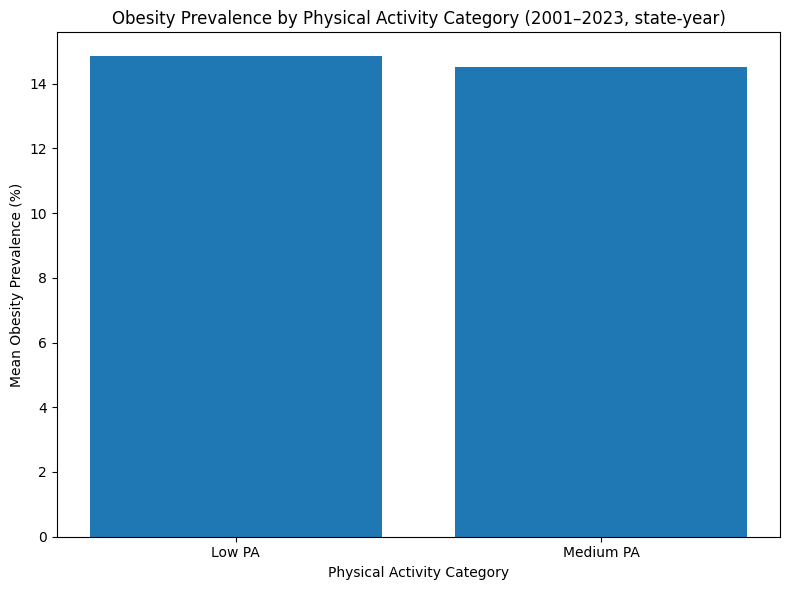

In [23]:
pa_valid = analysis_df.dropna(subset=["pa_cat", "obesity_pct"])

pa_summary = (
    pa_valid.groupby("pa_cat")["obesity_pct"]
    .mean()
    .reset_index()
)

print("Physical activity summary:")
print(pa_summary)

plt.bar(pa_summary["pa_cat"], pa_summary["obesity_pct"])
plt.xlabel("Physical Activity Category")
plt.ylabel("Mean Obesity Prevalence (%)")
plt.title("Obesity Prevalence by Physical Activity Category (2001–2023, state-year)")
plt.tight_layout()
plt.savefig("obesity_by_pa_category.png", dpi=300)
plt.show()


C:\Users\tydul\AppData\Local\Temp\ipykernel_25352\3113329610.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  soda_valid.groupby("soda_cat")["obesity_pct"]


Soda summary:
      soda_cat  obesity_pct
0     Low Soda    13.896840
1  Medium Soda    14.362925
2    High Soda    15.269749


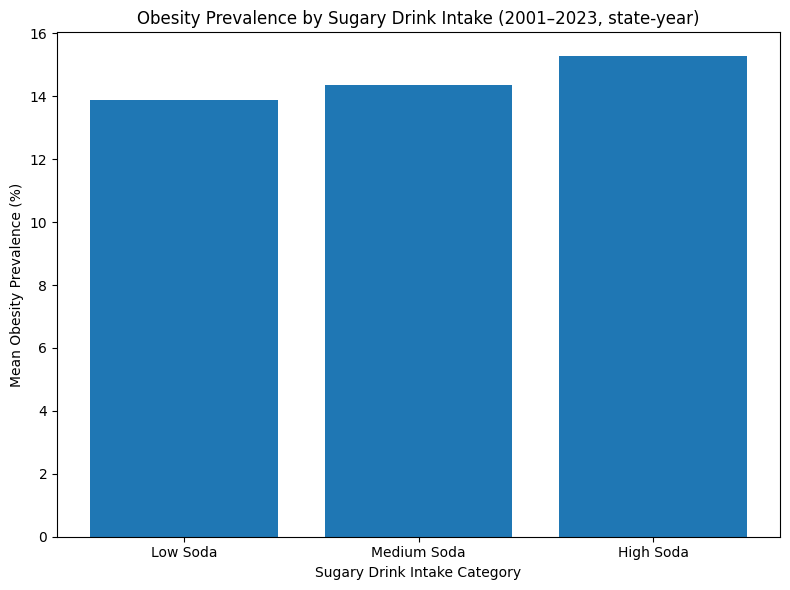

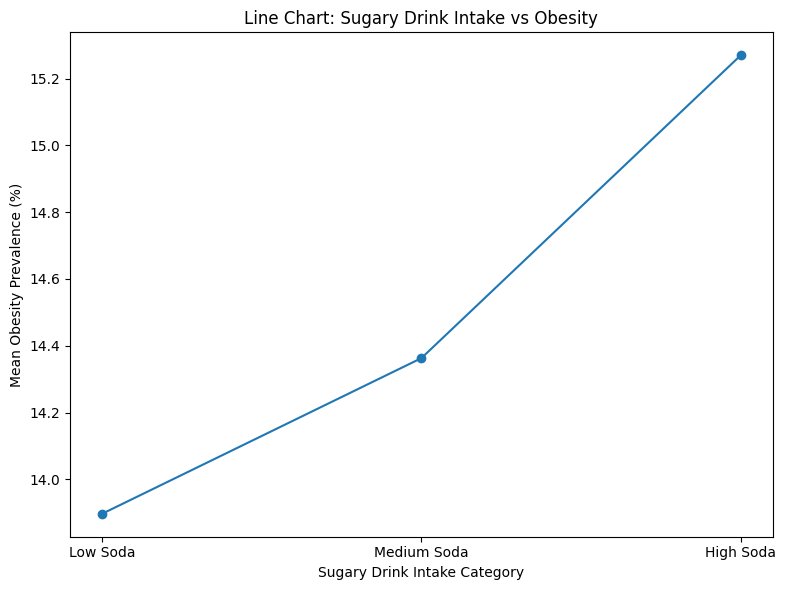

In [24]:
soda_valid = analysis_df.dropna(subset=["soda_cat", "obesity_pct"])

soda_summary = (
    soda_valid.groupby("soda_cat")["obesity_pct"]
    .mean()
    .reset_index()
)

print("Soda summary:")
print(soda_summary)

# Bar chart
plt.bar(soda_summary["soda_cat"], soda_summary["obesity_pct"])
plt.xlabel("Sugary Drink Intake Category")
plt.ylabel("Mean Obesity Prevalence (%)")
plt.title("Obesity Prevalence by Sugary Drink Intake (2001–2023, state-year)")
plt.tight_layout()
plt.savefig("obesity_by_soda_category_bar.png", dpi=300)
plt.show()

# Line chart
plt.plot(soda_summary["soda_cat"], soda_summary["obesity_pct"], marker="o")
plt.xlabel("Sugary Drink Intake Category")
plt.ylabel("Mean Obesity Prevalence (%)")
plt.title("Line Chart: Sugary Drink Intake vs Obesity")
plt.tight_layout()
plt.savefig("obesity_by_soda_category_line.png", dpi=300)
plt.show()




C:\Users\tydul\AppData\Local\Temp\ipykernel_25352\2460209042.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fruit_valid.groupby("low_fruit_cat")["obesity_pct"]


Insufficient fruit intake summary:
        low_fruit_cat  obesity_pct
0     Low Poor Intake     9.650000
1  Medium Poor Intake    13.893895
2    High Poor Intake          NaN


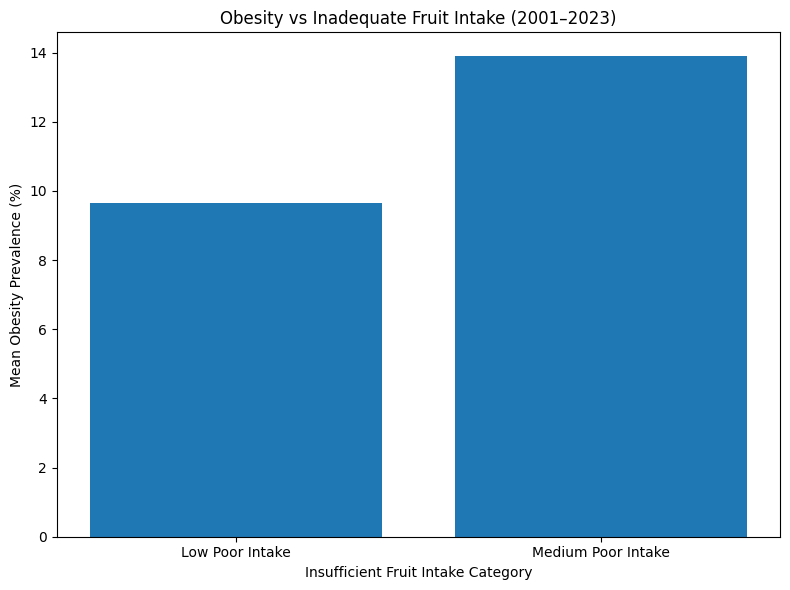

C:\Users\tydul\AppData\Local\Temp\ipykernel_25352\2460209042.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  veg_valid.groupby("low_veg_cat")["obesity_pct"]


Insufficient vegetable intake summary:
          low_veg_cat  obesity_pct
0     Low Poor Intake    10.614687
1  Medium Poor Intake    14.023716
2    High Poor Intake    16.324091


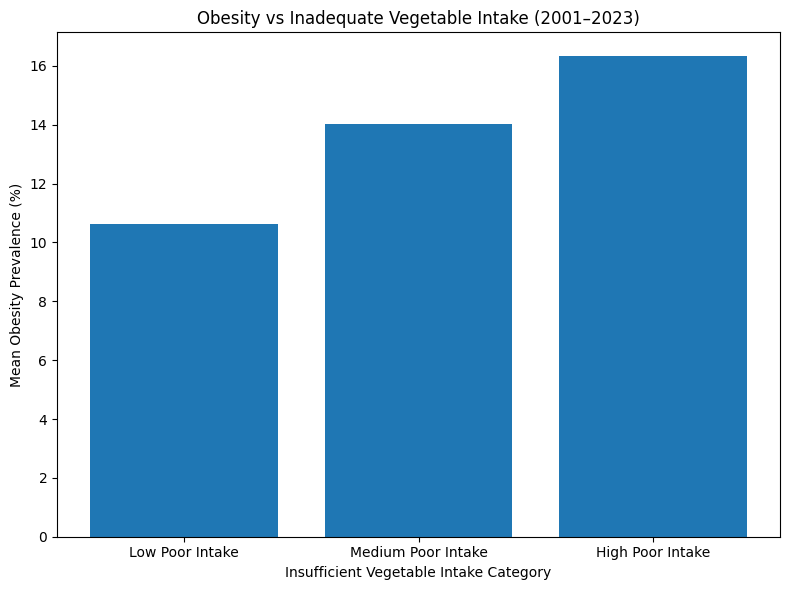

In [25]:
fruit_valid = analysis_df.dropna(subset=["low_fruit_cat", "obesity_pct"])

fruit_summary = (
    fruit_valid.groupby("low_fruit_cat")["obesity_pct"]
    .mean()
    .reset_index()
)

print("Insufficient fruit intake summary:")
print(fruit_summary)

plt.bar(fruit_summary["low_fruit_cat"], fruit_summary["obesity_pct"])
plt.xlabel("Insufficient Fruit Intake Category")
plt.ylabel("Mean Obesity Prevalence (%)")
plt.title("Obesity vs Inadequate Fruit Intake (2001–2023)")
plt.tight_layout()
plt.savefig("obesity_by_insufficient_fruit_intake.png", dpi=300)
plt.show()

veg_valid = analysis_df.dropna(subset=["low_veg_cat", "obesity_pct"])

veg_summary = (
    veg_valid.groupby("low_veg_cat")["obesity_pct"]
    .mean()
    .reset_index()
)

print("Insufficient vegetable intake summary:")
print(veg_summary)

plt.bar(veg_summary["low_veg_cat"], veg_summary["obesity_pct"])
plt.xlabel("Insufficient Vegetable Intake Category")
plt.ylabel("Mean Obesity Prevalence (%)")
plt.title("Obesity vs Inadequate Vegetable Intake (2001–2023)")
plt.tight_layout()
plt.savefig("obesity_by_insufficient_vegetable_intake.png", dpi=300)
plt.show()


Interpretation 

This analysis used YRBSS data from 2001–2023 to examine how behavioral factors relate to obesity among U.S. high school students. The key behaviors analyzed were physical activity, sugary drink intake, and insufficient fruit/vegetable consumption (defined as eating fruit or vegetables less than once daily).

Sugary drink intake showed the strongest relationship with obesity.
States with higher percentages of students drinking sugary beverages consistently had higher obesity rates across the years.

Physical activity showed a moderate protective effect.
Obesity prevalence was lower in states with higher levels of physical activity.

Insufficient fruit and vegetable intake showed weaker associations.
States where more students rarely consumed fruits or vegetables tended to have higher obesity levels, but the trend was not as strong as for soda or physical activity.


Conclusion 

Overall, the strongest behavioral predictor of obesity among high school students is sugary drink consumption, followed by physical activity, which is inversely related to obesity. Poor fruit and vegetable intake also contributes to obesity, but with a smaller effect. These findings emphasize the need for public health strategies that reduce sugary drink intake and promote active lifestyles and healthier eating habits among adolescents.